In [178]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse

In this EDA report, we use the EDGAR Log File on Mar 01, 2017. There are 27993316 observations in this day, which reflects 27993316 search activities from 00:00:00 to 23:59:59 on 03/01/2017 through SEC.gov.

There are 15 variables totally.

In [2]:
# loading data
data_path = "log20170301.csv"
df = pd.read_csv(data_path)

# see the basic info
df.info()

/Users/rachelzheng/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27993317 entries, 0 to 27993316
Data columns (total 15 columns):
ip           object
date         object
time         object
zone         float64
cik          float64
accession    object
extention    object
code         float64
size         float64
idx          float64
norefer      float64
noagent      float64
find         float64
crawler      float64
browser      object
dtypes: float64(9), object(6)
memory usage: 3.1+ GB


In [3]:
df.head()

,ip,date,time,zone,cik,accession,extention,code,size,idx,norefer,noagent,find,crawler,browser
0,101.71.41.ihh,2017-03-01,00:00:00,0.0,933141.0,0001193125-17-062751,-index.htm,301.0,683.0,1.0,0.0,0.0,10.0,0.0,NaN
1,101.71.41.ihh,2017-03-01,00:00:00,0.0,1595974.0,0001595974-17-000010,-index.htm,301.0,677.0,1.0,0.0,0.0,10.0,0.0,NaN
2,104.196.198.aej,2017-03-01,00:00:00,0.0,1096325.0,0001140361-17-009737,-index.htm,301.0,680.0,1.0,0.0,0.0,10.0,0.0,NaN
3,104.196.198.aej,2017-03-01,00:00:00,0.0,1660681.0,0001127602-17-008948,form4.xml,200.0,4955.0,0.0,0.0,0.0,10.0,0.0,NaN
4,104.196.198.aej,2017-03-01,00:00:00,0.0,1096325.0,0001140361-17-009737,-index.htm,200.0,7482.0,1.0,0.0,0.0,10.0,0.0,NaN


In [4]:
df.describe()

,zone,cik,code,size,idx,norefer,noagent,find,crawler
count,27993317.0,2.799332e+07,2.799323e+07,2.799332e+07,2.799323e+07,27993317.0,2.799332e+07,2.799323e+07,2.799323e+07
mean,0.0,8.002871e+19,2.427653e+02,1.427716e+05,4.870371e-01,0.0,4.214207e+00,9.649119e+00,1.095636e-02
std,0.0,1.001066e+22,6.908829e+01,1.893413e+06,4.998319e-01,0.0,2.486692e+03,1.608108e+00,1.040976e-01
min,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.0,8.452890e+05,2.000000e+02,6.770000e+02,0.000000e+00,0.0,0.000000e+00,1.000000e+01,0.000000e+00
50%,0.0,1.098880e+06,2.000000e+02,3.204000e+03,0.000000e+00,0.0,0.000000e+00,1.000000e+01,0.000000e+00
75%,0.0,1.414040e+06,3.010000e+02,7.748000e+03,1.000000e+00,0.0,0.000000e+00,1.000000e+01,0.000000e+00
max,0.0,1.688931e+24,5.040000e+02,4.343954e+08,1.000000e+00,0.0,1.698641e+06,1.000000e+01,1.000000e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a287a3810>,
      dtype=object)

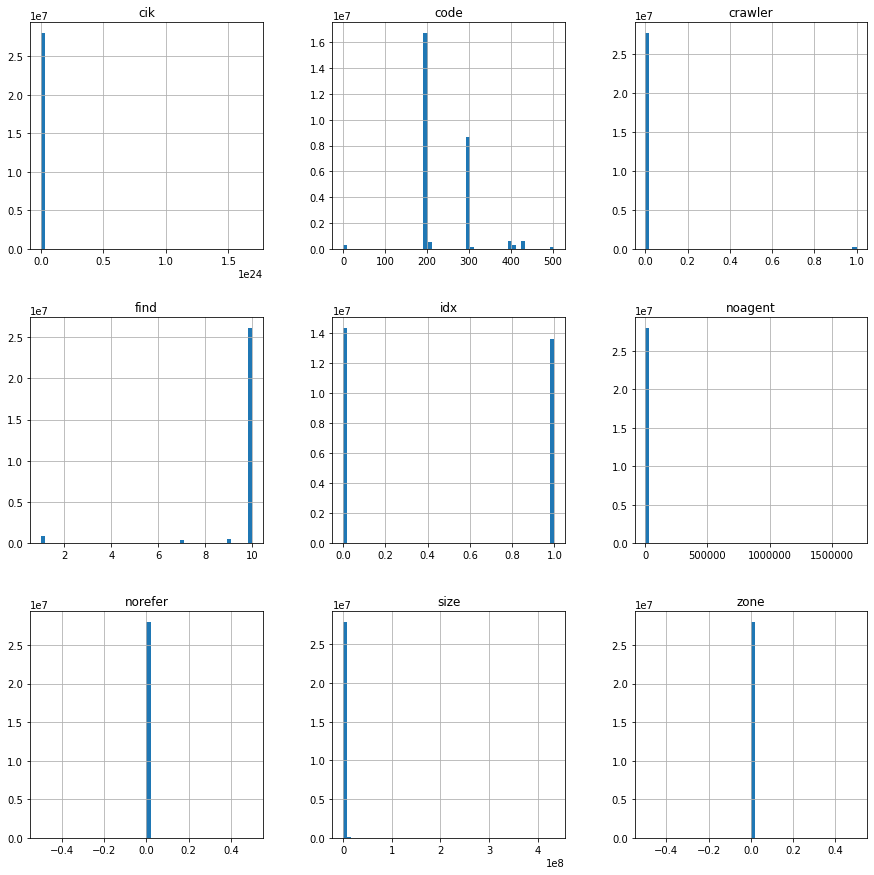

In [5]:
df.hist(bins=50, figsize=(15, 15))

In [6]:
# filter the observation who identifies itself as a crawler
df_norobot = df[df["crawler"]!=1]

In [7]:
df_norobot.head()

,ip,date,time,zone,cik,accession,extention,code,size,idx,norefer,noagent,find,crawler,browser
0,101.71.41.ihh,2017-03-01,00:00:00,0.0,933141.0,0001193125-17-062751,-index.htm,301.0,683.0,1.0,0.0,0.0,10.0,0.0,NaN
1,101.71.41.ihh,2017-03-01,00:00:00,0.0,1595974.0,0001595974-17-000010,-index.htm,301.0,677.0,1.0,0.0,0.0,10.0,0.0,NaN
2,104.196.198.aej,2017-03-01,00:00:00,0.0,1096325.0,0001140361-17-009737,-index.htm,301.0,680.0,1.0,0.0,0.0,10.0,0.0,NaN
3,104.196.198.aej,2017-03-01,00:00:00,0.0,1660681.0,0001127602-17-008948,form4.xml,200.0,4955.0,0.0,0.0,0.0,10.0,0.0,NaN
4,104.196.198.aej,2017-03-01,00:00:00,0.0,1096325.0,0001140361-17-009737,-index.htm,200.0,7482.0,1.0,0.0,0.0,10.0,0.0,NaN


In [8]:
df_norobot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27686613 entries, 0 to 27993316
Data columns (total 15 columns):
ip           object
date         object
time         object
zone         float64
cik          float64
accession    object
extention    object
code         float64
size         float64
idx          float64
norefer      float64
noagent      float64
find         float64
crawler      float64
browser      object
dtypes: float64(9), object(6)
memory usage: 3.3+ GB


We remove 306704 observations by filtering out "crawler=1".

In [9]:
df_norobot.describe()

,zone,cik,code,size,idx,norefer,noagent,find,crawler
count,27686613.0,2.768661e+07,2.768653e+07,2.768661e+07,2.768653e+07,27686613.0,2.768661e+07,2.768653e+07,27686529.0
mean,0.0,8.091525e+19,2.409792e+02,1.443448e+05,4.924291e-01,0.0,4.260889e+00,9.645283e+00,0.0
std,0.0,1.006596e+22,6.734162e+01,1.903812e+06,4.999427e-01,0.0,2.500427e+03,1.616529e+00,0.0
min,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.000000e+00,0.0
25%,0.0,8.420130e+05,2.000000e+02,6.770000e+02,0.000000e+00,0.0,0.000000e+00,1.000000e+01,0.0
50%,0.0,1.095996e+06,2.000000e+02,3.298000e+03,0.000000e+00,0.0,0.000000e+00,1.000000e+01,0.0
75%,0.0,1.415311e+06,3.010000e+02,7.775000e+03,1.000000e+00,0.0,0.000000e+00,1.000000e+01,0.0
max,0.0,1.688931e+24,5.040000e+02,4.343954e+08,1.000000e+00,0.0,1.698641e+06,1.000000e+01,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2eb2ea10>,
      dtype=object)

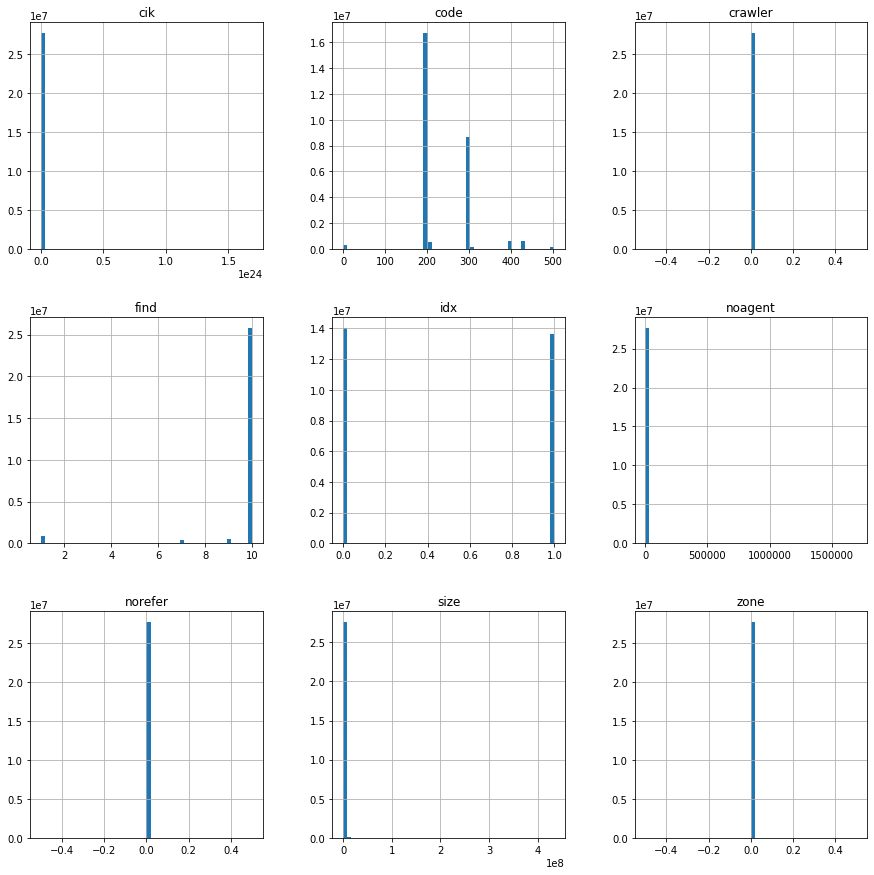

In [10]:
df_norobot.hist(bins=50, figsize=(15, 15))

Display plots for raw data - df.

In [76]:
df['clock'] = pd.to_datetime(df.time, format='%H:%M:%S')

df['Hour'] = df['clock'].dt.hour
df['Minute'] = df['clock'].dt.minute
df['Second'] = df['clock'].dt.second

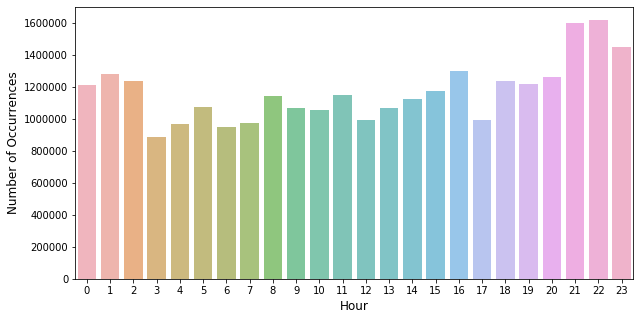

In [77]:
op_count = df['Hour'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
#plt.title('Ocean Proximity Summary')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()
# housing['ocean_proximity'].value_counts().hist()

In [78]:
sp2016 = pd.read_csv("sp2016.csv")
sp2016.head()

,gvkey,iid,gvkeyx,from,thru,conm,indextype,tic,spii,spmi,indexcat,co_conm,co_tic,co_cusip,cik,co_sic,co_naics
0,1078,1,31855,00:00.0,13:45.1,S&P 1500 Super Composite,BROAD,I0020,NaN,NaN,S&P,ABBOTT LABORATORIES,ABT,2824100,1800.0,2834,325412
1,1300,1,31855,00:00.0,13:45.1,S&P 1500 Super Composite,BROAD,I0020,NaN,NaN,S&P,HONEYWELL INTERNATIONAL INC,HON,438516106,773840.0,9997,336413
2,1440,1,31855,00:00.0,13:45.1,S&P 1500 Super Composite,BROAD,I0020,NaN,NaN,S&P,AMERICAN ELECTRIC POWER CO,AEP,25537101,4904.0,4911,2211
3,2285,1,31855,00:00.0,13:45.1,S&P 1500 Super Composite,BROAD,I0020,NaN,NaN,S&P,BOEING CO,BA,97023105,12927.0,3721,336411
4,2403,1,31855,00:00.0,13:45.1,S&P 1500 Super Composite,BROAD,I0020,NaN,NaN,S&P,BRISTOL-MYERS SQUIBB CO,BMY,110122108,14272.0,2834,325412


In [79]:
df1500 = pd.merge(sp2016[["cik"]],df,on="cik")

In [80]:
df1500.head()

,cik,ip,date,time,zone,accession,extention,code,size,idx,norefer,noagent,find,crawler,browser,clock,Hour,Minute,Second
0,1800.0,67.248.67.jja,2017-03-01,00:00:48,0.0,0001104659-10-003143,.txt,200.0,1087304.0,0.0,0.0,0.0,10.0,0.0,NaN,1900-01-01 00:00:48,0,0,48
1,1800.0,67.248.67.jja,2017-03-01,00:00:50,0.0,0001104659-10-008501,.txt,200.0,144695.0,0.0,0.0,0.0,10.0,0.0,NaN,1900-01-01 00:00:50,0,0,50
2,1800.0,67.248.67.jja,2017-03-01,00:00:50,0.0,0001104659-10-007120,.txt,200.0,184070.0,0.0,0.0,0.0,10.0,0.0,NaN,1900-01-01 00:00:50,0,0,50
3,1800.0,66.249.66.jfc,2017-03-01,00:02:58,0.0,0001179110-16-025994,xslF345X03/edgar.xml,200.0,3772.0,0.0,0.0,0.0,10.0,0.0,NaN,1900-01-01 00:02:58,0,2,58
4,1800.0,66.249.66.cah,2017-03-01,00:03:08,0.0,0001104659-15-017167,a15-5987_1ex99d1.htm,200.0,5621.0,0.0,0.0,0.0,10.0,0.0,NaN,1900-01-01 00:03:08,0,3,8


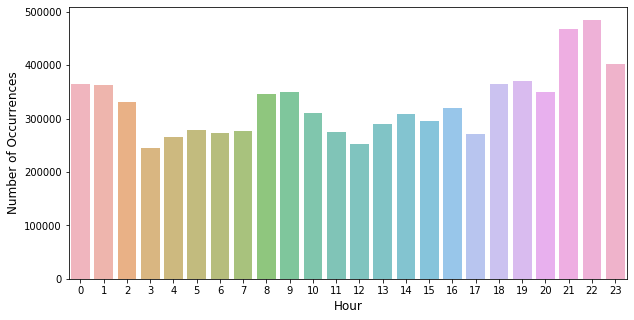

In [81]:
op_count = df1500['Hour'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
#plt.title('Ocean Proximity Summary')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()
# housing['ocean_proximity'].value_counts().hist()

In [82]:
sp500 = pd.read_csv("sp500.csv")

In [83]:
df500 = pd.merge(sp500[["cik"]],df,on="cik")

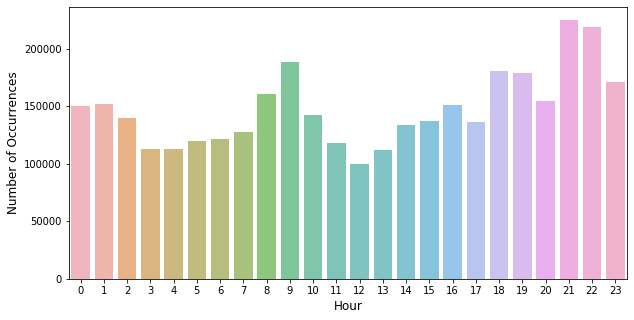

In [84]:
op_count = df500['Hour'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
#plt.title('Ocean Proximity Summary')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()
# housing['ocean_proximity'].value_counts().hist()

Display the plots for filtered dataset - df_norobot.

In [85]:
df_norobot['clock'] = pd.to_datetime(df_norobot.time, format='%H:%M:%S')

df_norobot['Hour'] = df_norobot['clock'].dt.hour
df_norobot['Minute'] = df_norobot['clock'].dt.minute
df_norobot['Second'] = df_norobot['clock'].dt.second

C:\Users\czh09\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\czh09\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\czh09\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

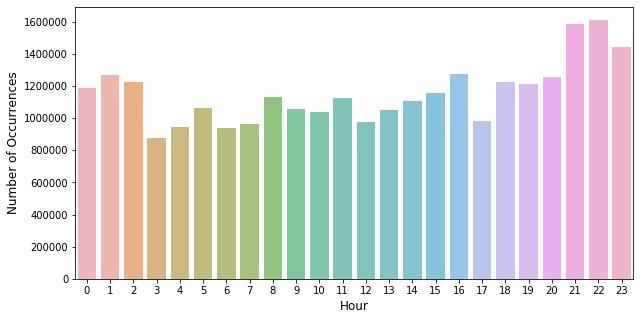

In [86]:
op_count = df_norobot['Hour'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()

Group observations by the ip address.

In [11]:
gk = df_norobot.groupby("ip")

In [12]:
gk.head()

,ip,date,time,zone,cik,accession,extention,code,size,idx,norefer,noagent,find,crawler,browser
0,101.71.41.ihh,2017-03-01,00:00:00,0.0,933141.0,0001193125-17-062751,-index.htm,301.0,683.0,1.0,0.0,0.0,10.0,0.0,NaN
1,101.71.41.ihh,2017-03-01,00:00:00,0.0,1595974.0,0001595974-17-000010,-index.htm,301.0,677.0,1.0,0.0,0.0,10.0,0.0,NaN
2,104.196.198.aej,2017-03-01,00:00:00,0.0,1096325.0,0001140361-17-009737,-index.htm,301.0,680.0,1.0,0.0,0.0,10.0,0.0,NaN
3,104.196.198.aej,2017-03-01,00:00:00,0.0,1660681.0,0001127602-17-008948,form4.xml,200.0,4955.0,0.0,0.0,0.0,10.0,0.0,NaN
4,104.196.198.aej,2017-03-01,00:00:00,0.0,1096325.0,0001140361-17-009737,-index.htm,200.0,7482.0,1.0,0.0,0.0,10.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27992713,107.72.162.cdg,2017-03-01,23:59:58,0.0,1090727.0,0001225208-17-004717,xslF345X01/doc4.xml,301.0,674.0,0.0,0.0,0.0,10.0,0.0,NaN
27992714,107.77.215.abc,2017-03-01,23:59:58,0.0,1090727.0,0001225208-17-004717,xslF345X01/doc4.xml,200.0,3815.0,0.0,0.0,0.0,10.0,0.0,NaN
27992803,137.151.175.aha,2017-03-01,23:59:58,0.0,37996.0,0000037996-17-000013,R1.htm,200.0,4479.0,0.0,0.0,0.0,8.0,0.0,NaN
27992898,38.104.50.bch,2017-03-01,23:59:58,0.0,31347.0,0001012870-00-004869,-0002.txt,200.0,34944.0,0.0,0.0,0.0,10.0,0.0,NaN


In [13]:
unique_ip = df_norobot.ip.unique().tolist()

In [14]:
search = []
for i in range(len(unique_ip)):
    data= gk.get_group(unique_ip[i])
    search.append(list(np.transpose(data["cik"])))

How many unique ip?

In [15]:
print("The unique ip searched on EDGAR is: ", len(unique_ip))

The unique ip searched on EDGAR is:  129639


The most searches on this day

In [16]:
max_search = 0
for i in range(len(search)):
    if len(search[i]) > max_search:
        max_search = len(search[i])
print("The most searches is: ", max_search)

The most searches is:  926292


In [17]:
#Distribution for search times per ip
freq = []
for i in range(len(search)):
    freq.append(len(search[i]))

In [18]:
b = pd.DataFrame(freq)

In [19]:
c = pd.concat([pd.DataFrame(unique_ip),b],axis=1)
c.columns = ["ip","Frequency"]

In [20]:
c.head()

,ip,Frequency
0,101.71.41.ihh,3544
1,104.196.198.aej,363879
2,106.120.173.jie,6011
3,107.23.85.jfd,112433
4,115.111.104.igg,26108


In [21]:
c.describe()

,Frequency
count,129639.000000
mean,213.567005
std,6608.126949
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,926292.000000


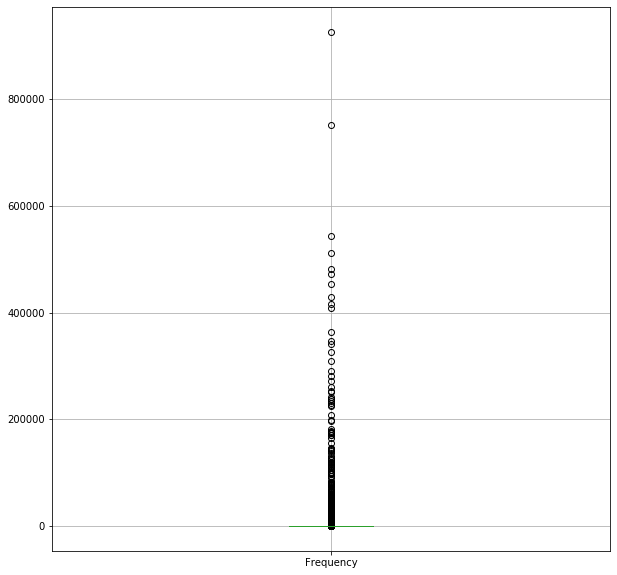

In [22]:
#Boxplot for the frequency
c.boxplot()

Restrict to the ip who searches no more than 213 times on this day.  

There are 126521 ip satisfied this condition.  

Using "search no more than 213", we filter out 3118 observations (2.4%).

In [26]:
c[c["Frequency"]<=213]

,ip,Frequency
5,115.193.188.jfd,1
9,12.130.117.jbf,8
25,164.67.178.gha,107
26,168.244.4.acc,9
36,184.186.204.efc,1
...,...,...
129634,106.37.115.abb,1
129635,107.72.162.cdg,1
129636,107.77.215.abc,1
129637,38.104.50.bch,1


Restrict to the ip who searches no more than 100 times on this day.  

There are 124625 ip satisfied this condition.  

Using "search no more than 100", we filter out 5014 observations (4%).

In [25]:
c[c["Frequency"]<=100]

,ip,Frequency
5,115.193.188.jfd,1
9,12.130.117.jbf,8
26,168.244.4.acc,9
36,184.186.204.efc,1
37,192.103.251.aje,75
...,...,...
129634,106.37.115.abb,1
129635,107.72.162.cdg,1
129636,107.77.215.abc,1
129637,38.104.50.bch,1


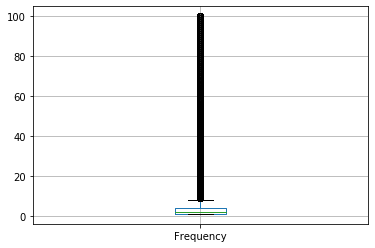

In [28]:
#Boxplot for the frequency
c[c["Frequency"]<=100].boxplot()

In [33]:
c[c["Frequency"]<=100].describe()

,Frequency
count,124625.000000
mean,6.734387
std,13.103823
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,100.000000


If only set the upper bound for the data (we try 20 below), the boxplot cannot give clear picture because of lack of lower bound.

When we restrict to the ip who search no more than 20 times on this day, we have 112131 observation, which remains 86%.

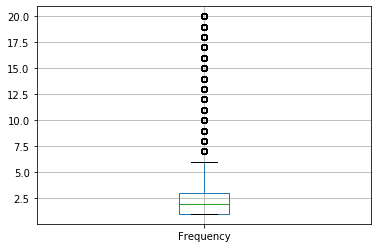

In [34]:
c[c["Frequency"]<=20].boxplot()

In [35]:
c[c["Frequency"]<=20].describe()

,Frequency
count,112131.000000
mean,2.918693
std,3.505906
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,20.000000


Set the lower bound to 3 - the ip should search at least 3 times in this day.

We only have 31908 observations after setting this constraints (24.6%).

The average search for this dataset is about 7 times.

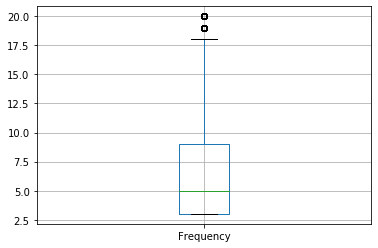

In [32]:
c[(c["Frequency"]<=20) & (c["Frequency"]>=3)].boxplot()

In [37]:
c[(c["Frequency"]<=20) & (c["Frequency"]>=3)].describe()

,Frequency
count,31908.000000
mean,6.948446
std,4.466927
min,3.000000
25%,3.000000
50%,5.000000
75%,9.000000
max,20.000000


In [38]:
d = c[(c["Frequency"]<=20) & (c["Frequency"]>=3)]
d.head()

,ip,Frequency
9,12.130.117.jbf,8
26,168.244.4.acc,9
96,114.251.201.jdd,8
108,4.16.47.edd,4
111,63.198.24.cjj,12


In [41]:
search = pd.merge(d["ip"],df_norobot,left_on="ip",right_on="ip",how="inner")

In [42]:
search.head()

,ip,date,time,zone,cik,accession,extention,code,size,idx,norefer,noagent,find,crawler,browser
0,12.130.117.jbf,2017-03-01,00:00:00,0.0,1361983.0,0000000000-16-091979,filename1.pdf,200.0,96148.0,0.0,0.0,0.0,9.0,0.0,NaN
1,12.130.117.jbf,2017-03-01,00:00:01,0.0,1361983.0,0000000000-16-091979,filename1.pdf,206.0,78518.0,0.0,0.0,0.0,7.0,0.0,NaN
2,12.130.117.jbf,2017-03-01,00:00:01,0.0,1361983.0,0000000000-16-091979,filename1.pdf,206.0,63433.0,0.0,0.0,0.0,7.0,0.0,NaN
3,12.130.117.jbf,2017-03-01,00:00:03,0.0,1361983.0,0000000000-16-091979,filename1.pdf,206.0,17182.0,0.0,0.0,0.0,7.0,0.0,NaN
4,12.130.117.jbf,2017-03-01,00:00:04,0.0,1361983.0,0000000000-16-091979,filename1.pdf,206.0,78518.0,0.0,0.0,0.0,7.0,0.0,NaN


In [46]:
search.describe()

,zone,cik,code,size,idx,norefer,noagent,find,crawler
count,221711.0,2.217110e+05,221711.000000,2.217110e+05,221711.000000,221711.0,221711.000000,221711.000000,221711.0
mean,0.0,1.508725e+20,213.236497,1.204541e+05,0.391613,0.0,0.002111,7.147079,0.0
std,0.0,1.492340e+22,45.121564,8.061378e+05,0.488112,0.0,0.045896,3.784726,0.0
min,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.000000,1.000000,0.0
25%,0.0,8.310010e+05,200.000000,2.753000e+03,0.000000,0.0,0.000000,1.000000,0.0
50%,0.0,1.129155e+06,200.000000,3.565000e+03,0.000000,0.0,0.000000,9.000000,0.0
75%,0.0,1.458962e+06,200.000000,2.350950e+04,1.000000,0.0,0.000000,10.000000,0.0
max,0.0,1.615258e+24,504.000000,6.986326e+07,1.000000,0.0,1.000000,10.000000,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1aca132190>,
      dtype=object)

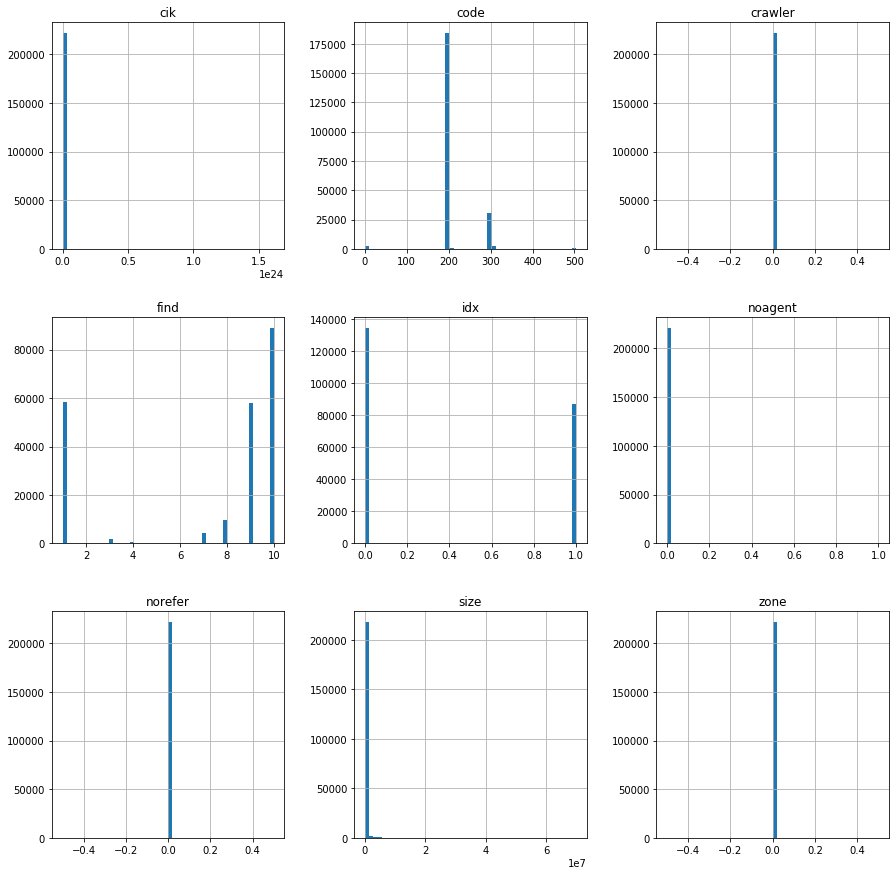

In [47]:
search.hist(bins=50, figsize=(15,15))

Problem 1: Some IP searches for the same company (cik-based).

In [66]:
p1 = []
for i in range(len(d)):
    if len(gk.get_group(d.iloc[i,0]).cik.unique())>=2:
        p1.append(d.iloc[i,0])

In [68]:
df_p1 = pd.DataFrame(p1)
df_p1.columns = ["ip"]

In [69]:
df_p1.head()

,ip
0,168.244.4.acc
1,4.16.47.edd
2,63.198.24.cjj
3,139.182.204.jga
4,76.90.49.hbf


p1 corresponds to the company who not only satisfies the previous condition but also searches for at least 2 unique firms in this day.

In [70]:
search_p1 = pd.merge(df_p1["ip"],df_norobot,left_on="ip",right_on="ip",how="inner")

In [71]:
search_p1.head()

,ip,date,time,zone,cik,accession,extention,code,size,idx,norefer,noagent,find,crawler,browser
0,168.244.4.acc,2017-03-01,00:00:00,0.0,104169.0,0000104169-16-000140,R8.htm,200.0,5442.0,0.0,0.0,0.0,8.0,0.0,NaN
1,168.244.4.acc,2017-03-01,00:00:02,0.0,104169.0,0000104169-16-000140,R9.htm,200.0,4051.0,0.0,0.0,0.0,8.0,0.0,NaN
2,168.244.4.acc,2017-03-01,00:00:22,0.0,1618921.0,0001140361-16-083198,R1.htm,200.0,4287.0,0.0,0.0,0.0,8.0,0.0,NaN
3,168.244.4.acc,2017-03-01,00:00:37,0.0,1618921.0,0001140361-16-083198,R10.htm,200.0,15597.0,0.0,0.0,0.0,8.0,0.0,NaN
4,168.244.4.acc,2017-03-01,00:00:48,0.0,1618921.0,0001140361-16-083198,R6.htm,200.0,6483.0,0.0,0.0,0.0,8.0,0.0,NaN


In [72]:
search_p1.describe()

,zone,cik,code,size,idx,norefer,noagent,find,crawler
count,161094.0,1.610940e+05,161094.000000,1.610940e+05,161094.000000,161094.0,161094.000000,161094.000000,161094.0
mean,0.0,2.076433e+20,215.751077,1.314466e+05,0.386327,0.0,0.002471,7.326859,0.0
std,0.0,1.750708e+22,47.069270,8.433774e+05,0.486909,0.0,0.049644,3.753308,0.0
min,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.000000,1.000000,0.0
25%,0.0,8.506930e+05,200.000000,2.719000e+03,0.000000,0.0,0.000000,3.000000,0.0
50%,0.0,1.135202e+06,200.000000,3.570000e+03,0.000000,0.0,0.000000,9.000000,0.0
75%,0.0,1.464423e+06,200.000000,2.510600e+04,1.000000,0.0,0.000000,10.000000,0.0
max,0.0,1.615258e+24,504.000000,6.986326e+07,1.000000,0.0,1.000000,10.000000,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1ac95684d0>,
      dtype=object)

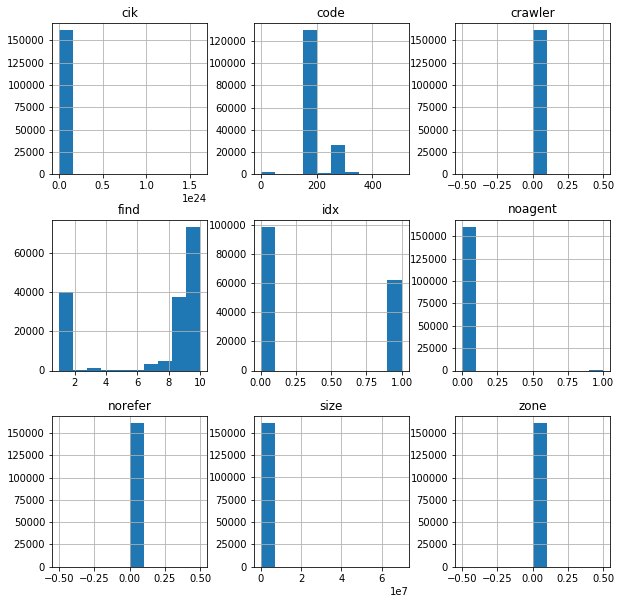

In [74]:
search_p1.hist(figsize=(10,10))

In [75]:
search_p1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161094 entries, 0 to 161093
Data columns (total 15 columns):
ip           161094 non-null object
date         161094 non-null object
time         161094 non-null object
zone         161094 non-null float64
cik          161094 non-null float64
accession    161094 non-null object
extention    161094 non-null object
code         161094 non-null float64
size         161094 non-null float64
idx          161094 non-null float64
norefer      161094 non-null float64
noagent      161094 non-null float64
find         161094 non-null float64
crawler      161094 non-null float64
browser      0 non-null object
dtypes: float64(9), object(6)
memory usage: 19.7+ MB


For "search_p1" dataset,  totally we have 161094 observations. It is from 20762 unique ips and searches for 22882 unique firms.

In [79]:
len(search_p1["ip"].unique())

20762

In [80]:
len(search_p1["cik"].unique())

22882

In [81]:
search_p1['clock'] = pd.to_datetime(search_p1.time, format='%H:%M:%S')

search_p1['Hour'] = search_p1['clock'].dt.hour
search_p1['Minute'] = search_p1['clock'].dt.minute
search_p1['Second'] = search_p1['clock'].dt.second

# Plot the searching behavior by hour for all users.

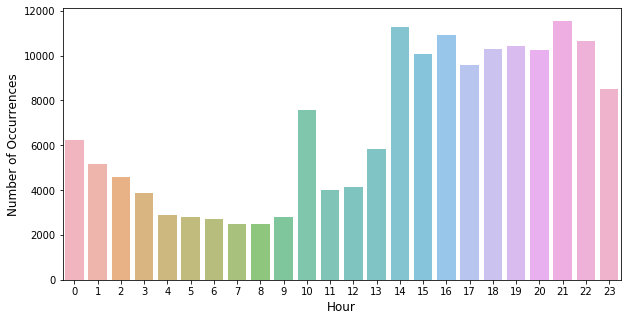

In [83]:
op_count = search_p1['Hour'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()

Select several active users to check their searching behaviors.

In [94]:
e = pd.merge(df_p1,d,left_on="ip",right_on="ip",how="inner")
e.sort_values(by=["Frequency"],ascending=False)

,ip,Frequency
11276,24.229.33.gai,20
13533,117.136.0.bif,20
4129,71.188.73.jga,20
398,24.228.222.jca,20
1325,47.184.133.ajc,20
...,...,...
6097,57.72.33.ech,3
12346,66.251.214.ahf,3
6111,212.50.99.aje,3
6112,105.96.9.jbd,3


Example 1: For ip = "24.229.33.gai":

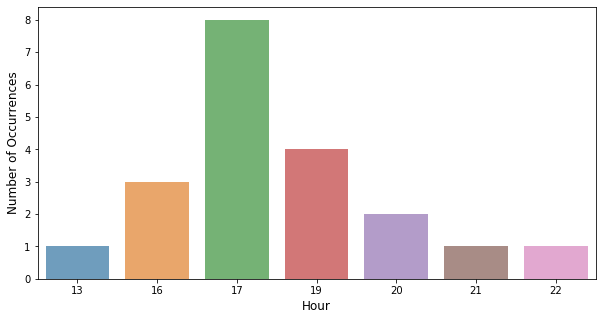

In [160]:
t = search_p1.loc[search_p1.ip=="24.229.33.gai"]
op_count = t['Hour'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()

In [164]:
t = search_p1.loc[search_p1.ip=="24.229.33.gai"]
t[["time","cik"]]

,time,cik
86157,13:59:25,105418.0
86158,16:22:29,105418.0
86159,16:22:46,105418.0
86160,16:22:49,105418.0
86161,17:38:09,105418.0
86162,17:38:12,105418.0
86163,17:40:58,105418.0
86164,17:41:01,105418.0
86165,17:41:57,105418.0
86166,17:42:00,105418.0


Companies it searches for: 105418 (WEIS MARKETS), 1169987 (HTG MOLECULAR DIAGNOSTICS), 1370946 (Owens Corning).

Example 2: For ip = "117.136.0.bif":

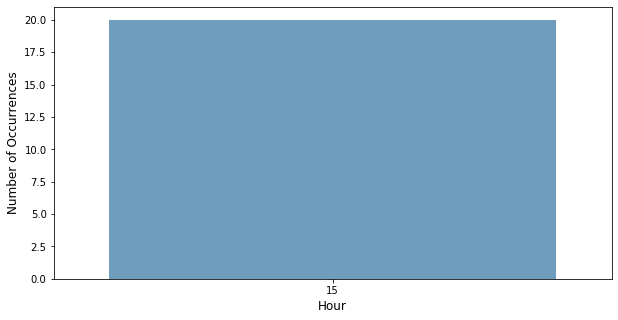

In [95]:
t = search_p1.loc[search_p1.ip=="117.136.0.bif"]
op_count = t['Hour'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()

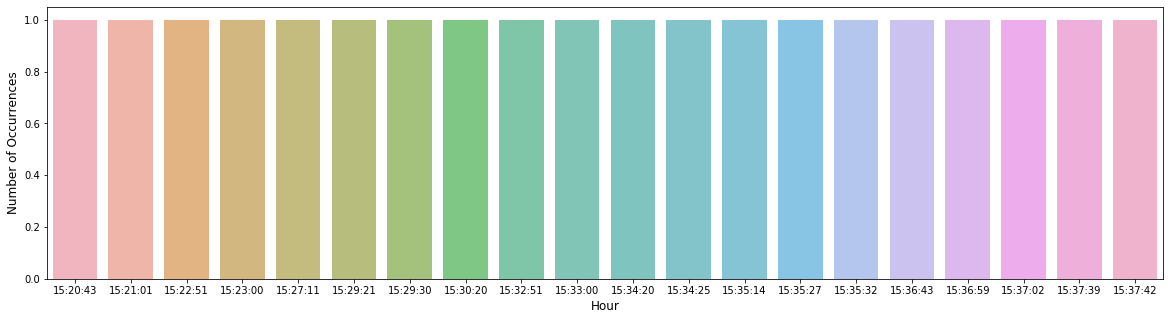

In [108]:
t = search_p1.loc[search_p1.ip=="117.136.0.bif"]
op_count = t['time'].value_counts().sort_index()
plt.figure(figsize=(20,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()

In [165]:
t = search_p1.loc[search_p1.ip=="117.136.0.bif"]
t[["time","cik"]]

,time,cik
103228,15:20:43,1530238.0
103229,15:21:01,1530238.0
103230,15:22:51,1530238.0
103231,15:23:00,1530238.0
103232,15:27:11,1530238.0
103233,15:29:21,1530238.0
103234,15:29:30,1530238.0
103235,15:30:20,1530238.0
103236,15:32:51,1610601.0
103237,15:33:00,1610601.0


Companies it searched for: 1520238 (DAS GLOBAL CAPITAL CORP), 1610601 (Momo Inc.)

Example 3: For ip = "71.188.73.jga	":

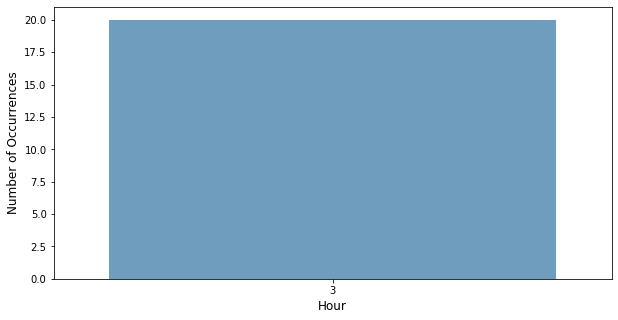

In [109]:
t = search_p1.loc[search_p1.ip=="71.188.73.jga"]
op_count = t['Hour'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()

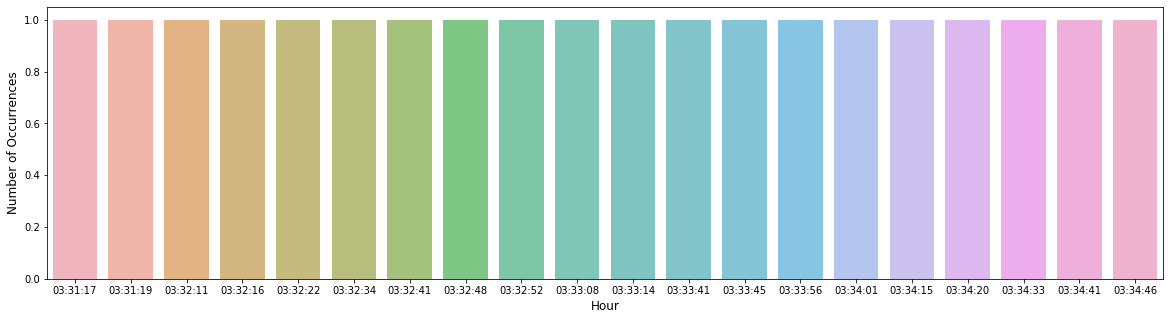

In [110]:
t = search_p1.loc[search_p1.ip=="71.188.73.jga"]
op_count = t['time'].value_counts().sort_index()
plt.figure(figsize=(20,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()

Example 4: For ip = "24.228.222.jca":

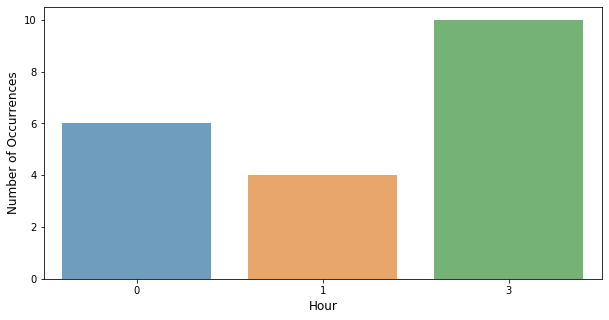

In [111]:
t = search_p1.loc[search_p1.ip=="24.228.222.jca"]
op_count = t['Hour'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()

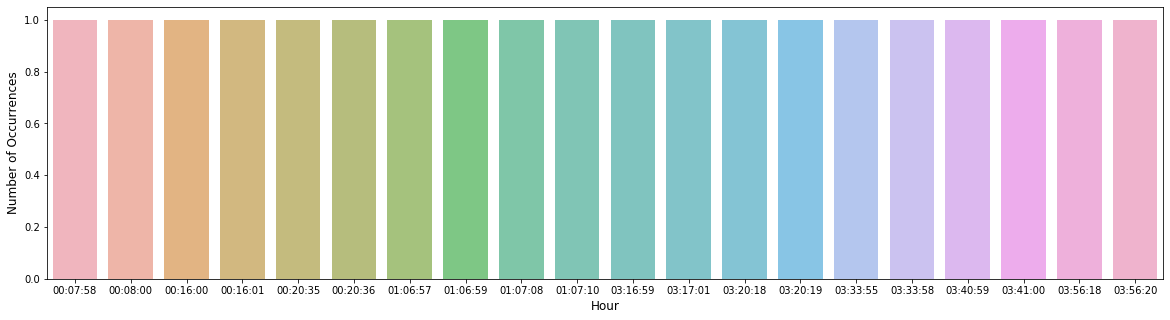

In [112]:
t = search_p1.loc[search_p1.ip=="24.228.222.jca"]
op_count = t['time'].value_counts().sort_index()
plt.figure(figsize=(20,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()

Example 5: For ip = "47.184.133.ajc	":

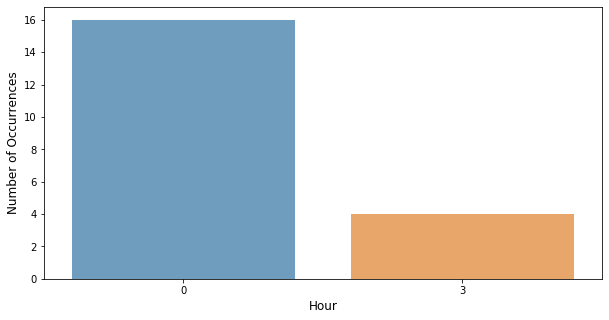

In [113]:
t = search_p1.loc[search_p1.ip=="47.184.133.ajc"]
op_count = t['Hour'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()

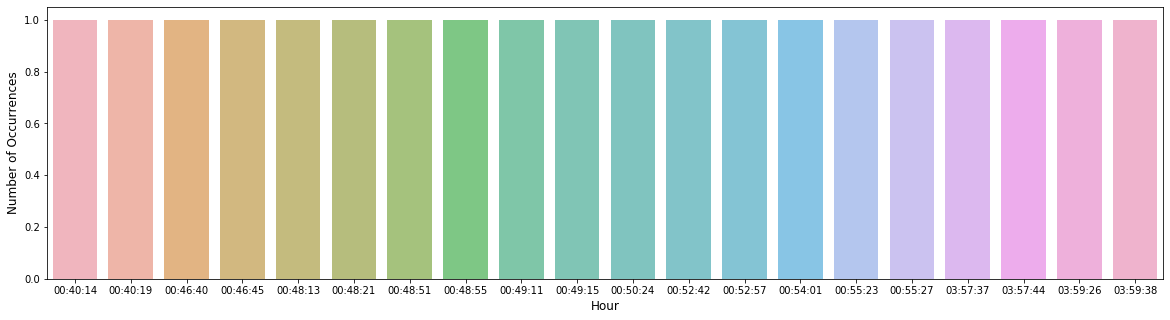

In [114]:
t = search_p1.loc[search_p1.ip=="47.184.133.ajc"]
op_count = t['time'].value_counts().sort_index()
plt.figure(figsize=(20,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()

Example 6: For ip = "57.72.33.ech":

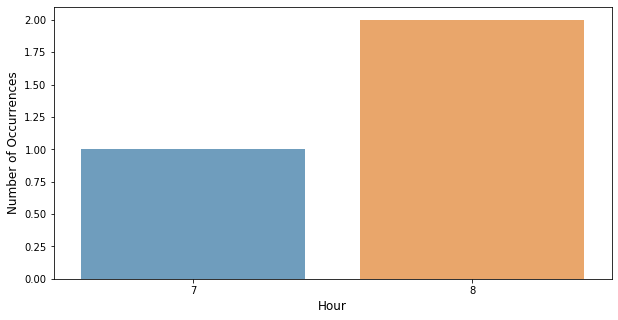

In [115]:
t = search_p1.loc[search_p1.ip=="57.72.33.ech"]
op_count = t['Hour'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()

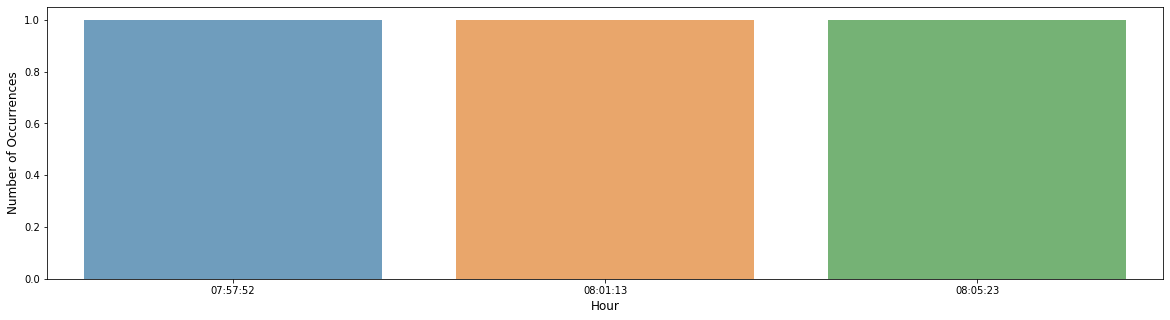

In [117]:
t = search_p1.loc[search_p1.ip=="57.72.33.ech"]
op_count = t['time'].value_counts().sort_index()
plt.figure(figsize=(20,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()

Example 7: For ip = "66.251.214.ahf":

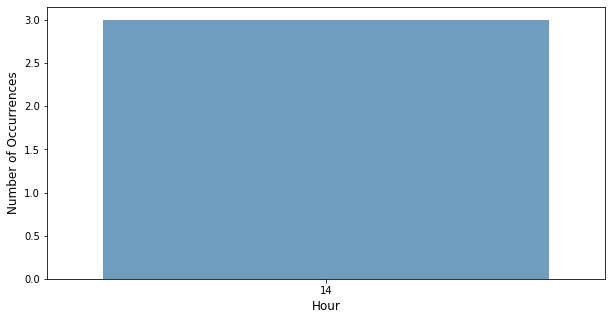

In [116]:
t = search_p1.loc[search_p1.ip=="66.251.214.ahf"]
op_count = t['Hour'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()

Example 8: For ip = "212.50.99.aje	":

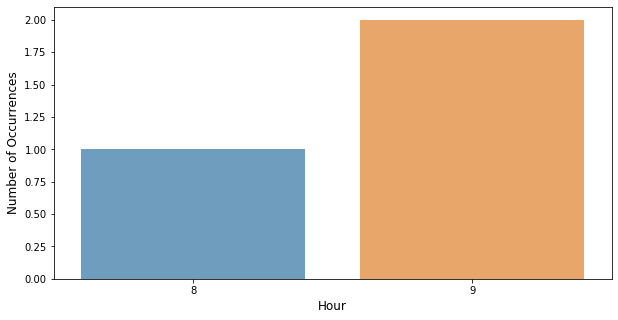

In [118]:
t = search_p1.loc[search_p1.ip=="212.50.99.aje"]
op_count = t['Hour'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()

Example 9: For ip = "105.96.9.jbd	":

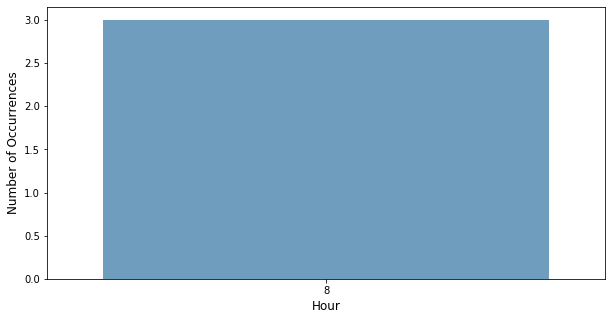

In [119]:
t = search_p1.loc[search_p1.ip=="105.96.9.jbd"]
op_count = t['Hour'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()

Example 10: For ip = "82.38.171.ahg	":

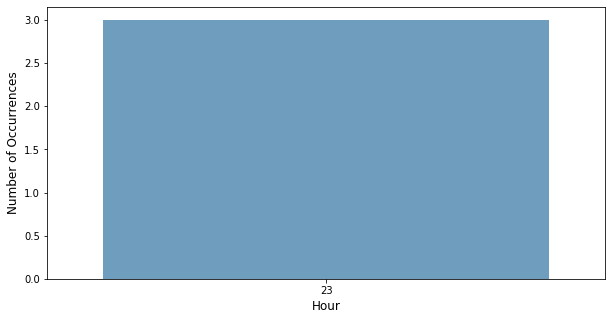

In [123]:
t = search_p1.loc[search_p1.ip=="82.38.171.ahg"]
op_count = t['Hour'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()

For active users (>=75%):

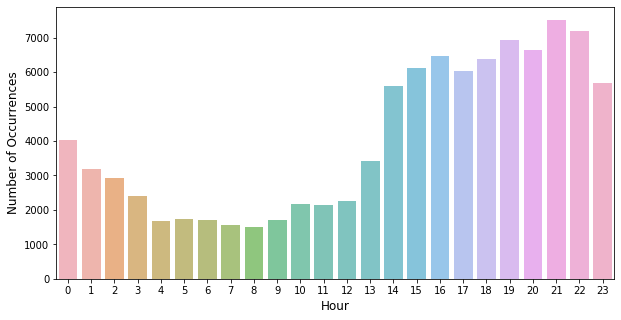

In [132]:
f = e[e["Frequency"]>=9]
t = pd.merge(f,search_p1,left_on="ip",right_on="ip",how="inner")
op_count = t['Hour'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()

# Improve the upper bound to 50, which means each ip could search for no more than 50 times in that day.

In this dataset, we have 41894 observations. The average search is 13.

In [305]:
g = c[(c["Frequency"]<=50) & (c["Frequency"]>=3)]
g.describe()

,Frequency
count,41894.000000
mean,13.347305
std,12.695848
min,3.000000
25%,4.000000
50%,7.000000
75%,19.000000
max,50.000000


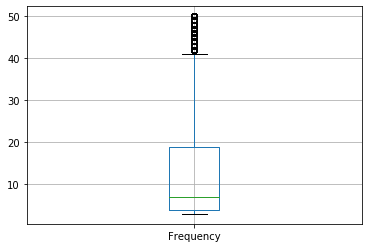

In [306]:
c[(c["Frequency"]<=50) & (c["Frequency"]>=3)].boxplot()

It still needs to satisfy that this ip searches for at least 2 unique firms.

In [307]:
p2 = []
for i in range(len(g)):
    if len(gk.get_group(g.iloc[i,0]).cik.unique())>=2:
        p2.append(g.iloc[i,0])

In [308]:
df_p2 = pd.DataFrame(p2)
df_p2.columns = ["ip"]

In [328]:
search_p2 = pd.merge(df_p2,df_norobot,left_on="ip",right_on="ip",how="inner")

In [329]:
search_p2.head()

,ip,date,time,zone,cik,accession,extention,code,size,idx,norefer,noagent,find,crawler,browser
0,168.244.4.acc,2017-03-01,00:00:00,0.0,104169.0,0000104169-16-000140,R8.htm,200.0,5442.0,0.0,0.0,0.0,8.0,0.0,NaN
1,168.244.4.acc,2017-03-01,00:00:02,0.0,104169.0,0000104169-16-000140,R9.htm,200.0,4051.0,0.0,0.0,0.0,8.0,0.0,NaN
2,168.244.4.acc,2017-03-01,00:00:22,0.0,1618921.0,0001140361-16-083198,R1.htm,200.0,4287.0,0.0,0.0,0.0,8.0,0.0,NaN
3,168.244.4.acc,2017-03-01,00:00:37,0.0,1618921.0,0001140361-16-083198,R10.htm,200.0,15597.0,0.0,0.0,0.0,8.0,0.0,NaN
4,168.244.4.acc,2017-03-01,00:00:48,0.0,1618921.0,0001140361-16-083198,R6.htm,200.0,6483.0,0.0,0.0,0.0,8.0,0.0,NaN


"search_p2" is the dataset which constricts the ip searching activity between 3 and 50. Also it requires the ip need to search for at least 2 firms in this day.

"search_p2" contains 485287 observations, from 30319 unique ip for 118103 unique companies (cik-based).

In [330]:
search_p2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485287 entries, 0 to 485286
Data columns (total 15 columns):
ip           485287 non-null object
date         485287 non-null object
time         485287 non-null object
zone         485287 non-null float64
cik          485287 non-null float64
accession    485287 non-null object
extention    485287 non-null object
code         485287 non-null float64
size         485287 non-null float64
idx          485287 non-null float64
norefer      485287 non-null float64
noagent      485287 non-null float64
find         485287 non-null float64
crawler      485287 non-null float64
browser      0 non-null object
dtypes: float64(9), object(6)
memory usage: 59.2+ MB


In [331]:
search_p2.describe()

,zone,cik,code,size,idx,norefer,noagent,find,crawler
count,485287.0,4.852870e+05,485287.000000,4.852870e+05,485287.000000,485287.0,485287.000000,485287.000000,485287.0
mean,0.0,7.930187e+19,227.220288,7.878043e+04,0.642339,0.0,0.001420,4.581029,0.0
std,0.0,1.077508e+22,49.941529,9.131707e+05,0.479312,0.0,0.037653,4.174157,0.0
min,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.000000,1.000000,0.0
25%,0.0,9.236660e+05,200.000000,6.800000e+02,0.000000,0.0,0.000000,1.000000,0.0
50%,0.0,1.313978e+06,200.000000,2.818000e+03,1.000000,0.0,0.000000,1.000000,0.0
75%,0.0,1.449762e+06,301.000000,4.578000e+03,1.000000,0.0,0.000000,9.000000,0.0
max,0.0,1.649339e+24,504.000000,3.242720e+08,1.000000,0.0,1.000000,10.000000,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1aac600450>,
      dtype=object)

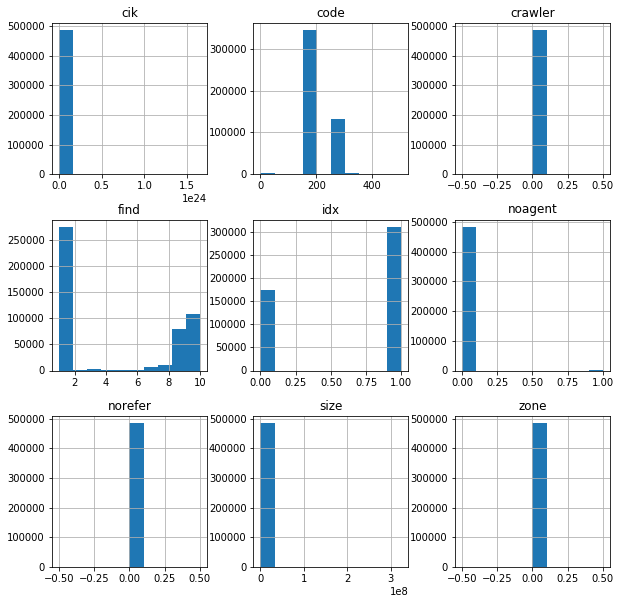

In [332]:
search_p2.hist(figsize=(10,10))

In [333]:
len(search_p2.ip.unique())

30319

In [334]:
len(search_p2.cik.unique())

118103

In [335]:
search_p2['clock'] = pd.to_datetime(search_p2.time, format='%H:%M:%S')

search_p2['Hour'] = search_p2['clock'].dt.hour
search_p2['Minute'] = search_p2['clock'].dt.minute
search_p2['Second'] = search_p2['clock'].dt.second

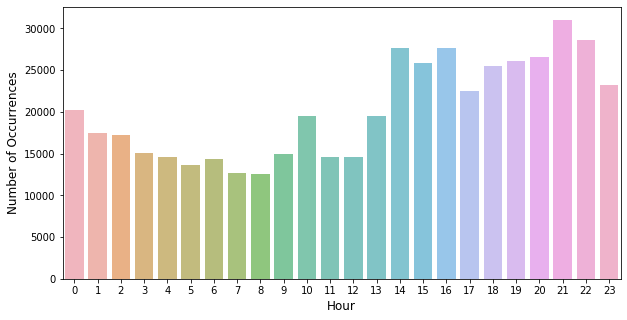

In [336]:
op_count = search_p2['Hour'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()

In [337]:
h = pd.merge(df_p2,g,left_on="ip",right_on="ip",how="inner")
h.sort_values(by=["Frequency"],ascending=False)

,ip,Frequency
3367,192.225.161.iee,50
8297,63.223.114.ajg,50
2387,69.4.84.haa,50
10106,199.241.144.jbh,50
19082,207.250.69.ech,50
...,...,...
17445,107.77.203.dfh,3
17440,144.76.22.fgi,3
17425,206.80.114.hah,3
17424,60.243.125.fdi,3


Example 1: ip = "192.225.161.iee"

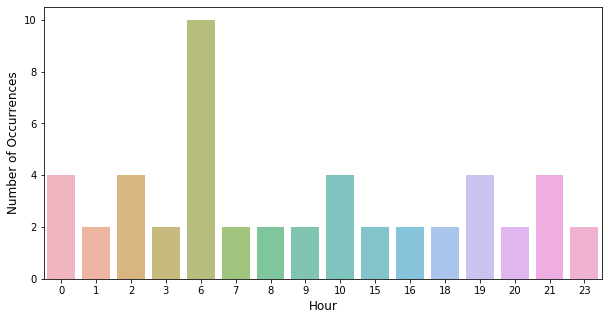

In [364]:
t = search_p2.loc[search_p2.ip=="192.225.161.iee"]
op_count = t['Hour'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()

In [366]:
t = search_p2.loc[search_p2.ip=="192.225.161.iee"]
t[["time","cik"]]

,time,cik
91889,00:31:06,1353945.0
91890,00:31:06,1353945.0
91891,00:41:35,1350667.0
91892,00:41:36,1350667.0
91893,01:53:16,1363252.0
91894,01:53:16,1363252.0
91895,02:32:41,1369791.0
91896,02:32:41,1369791.0
91897,02:39:53,1369860.0
91898,02:39:54,1369860.0


In [367]:
t["cik"].unique()

array([1353945., 1350667., 1363252., 1369791., 1369860., 1380790.,
       1400240., 1394830., 1398445., 1422798., 1388001., 1430726.,
       1437723., 1446975., 1459987., 1466296., 1436678.,  352947.,
        914026., 1023260., 1026082., 1043468., 1058684., 1056854.,
       1106360.])

Example 2: ip = "63.223.114.ajg"

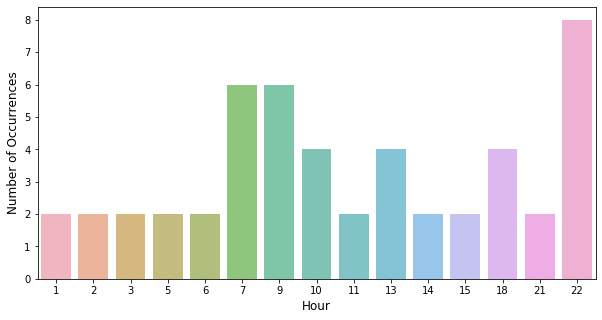

In [342]:
t = search_p2.loc[search_p2.ip=="63.223.114.ajg"]
op_count = t['Hour'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()

Example 3: ip = "69.4.84.haa"

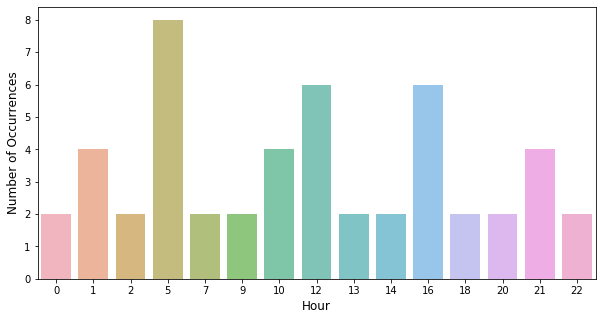

In [343]:
t = search_p2.loc[search_p2.ip=="69.4.84.haa"]
op_count = t['Hour'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()

Example 4: ip = "199.241.144.jbh"

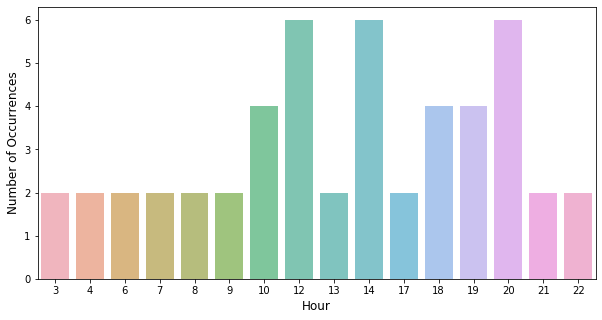

In [345]:
t = search_p2.loc[search_p2.ip=="199.241.144.jbh"]
op_count = t['Hour'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()

Example 5: ip = "207.250.69.ech"

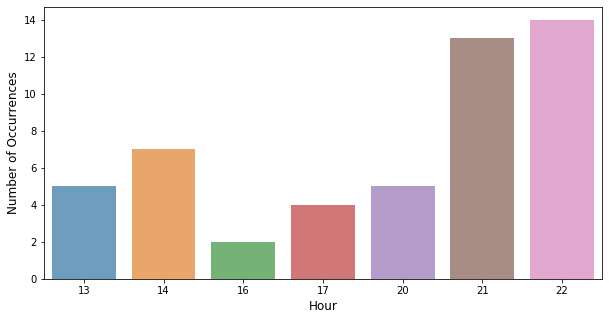

In [344]:
t = search_p2.loc[search_p2.ip=="207.250.69.ech"]
op_count = t['Hour'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()

# Draw the distribution for the time difference between searches

In [346]:
second_diff = []

for i in range(search_p2.shape[0]):
    if i == 0:
        second_diff.append(np.nan)
    else:
        if search_p2.iloc[i,0] == search_p2.iloc[i-1,0]:
            a = parse(search_p2.iloc[i,1]+"/"+search_p2.iloc[i,2])
            b = parse(search_p2.iloc[i-1,1]+"/"+search_p2.iloc[i-1,2])
            second_diff.append((a-b).seconds)
        else:
            second_diff.append(np.nan)

In [347]:
second = pd.DataFrame(second_diff,columns = ["second_diff"])
search_p2 = pd.concat([search_p2, second], axis=1)

In [348]:
search_p2.head()

,ip,date,time,zone,cik,accession,extention,code,size,idx,norefer,noagent,find,crawler,browser,clock,Hour,Minute,Second,second_diff
0,168.244.4.acc,2017-03-01,00:00:00,0.0,104169.0,0000104169-16-000140,R8.htm,200.0,5442.0,0.0,0.0,0.0,8.0,0.0,NaN,1900-01-01 00:00:00,0,0,0,NaN
1,168.244.4.acc,2017-03-01,00:00:02,0.0,104169.0,0000104169-16-000140,R9.htm,200.0,4051.0,0.0,0.0,0.0,8.0,0.0,NaN,1900-01-01 00:00:02,0,0,2,2.0
2,168.244.4.acc,2017-03-01,00:00:22,0.0,1618921.0,0001140361-16-083198,R1.htm,200.0,4287.0,0.0,0.0,0.0,8.0,0.0,NaN,1900-01-01 00:00:22,0,0,22,20.0
3,168.244.4.acc,2017-03-01,00:00:37,0.0,1618921.0,0001140361-16-083198,R10.htm,200.0,15597.0,0.0,0.0,0.0,8.0,0.0,NaN,1900-01-01 00:00:37,0,0,37,15.0
4,168.244.4.acc,2017-03-01,00:00:48,0.0,1618921.0,0001140361-16-083198,R6.htm,200.0,6483.0,0.0,0.0,0.0,8.0,0.0,NaN,1900-01-01 00:00:48,0,0,48,11.0


Boxplot for search time difference.

In [349]:
search_p2["second_diff"].describe()

count    454968.000000
mean       2133.578696
std        5932.257096
min           0.000000
25%           1.000000
50%          22.000000
75%        1603.000000
max       84912.000000
Name: second_diff, dtype: float64

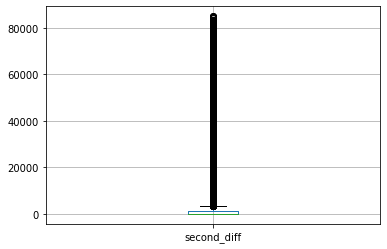

In [269]:
search_p2.boxplot(column = "second_diff")

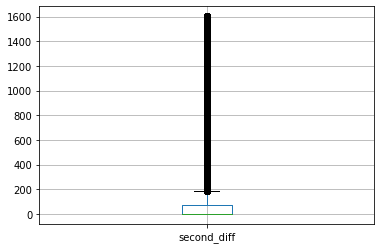

In [350]:
search_p2[search_p2["second_diff"]<=1603].boxplot(column = "second_diff")

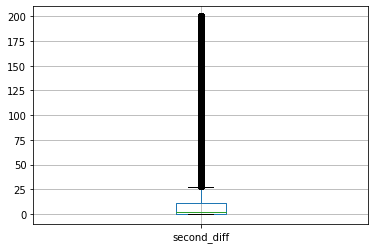

In [351]:
search_p2[search_p2["second_diff"]<=200].boxplot(column = "second_diff")

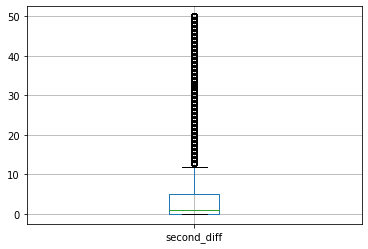

In [352]:
search_p2[search_p2["second_diff"]<=50].boxplot(column = "second_diff")

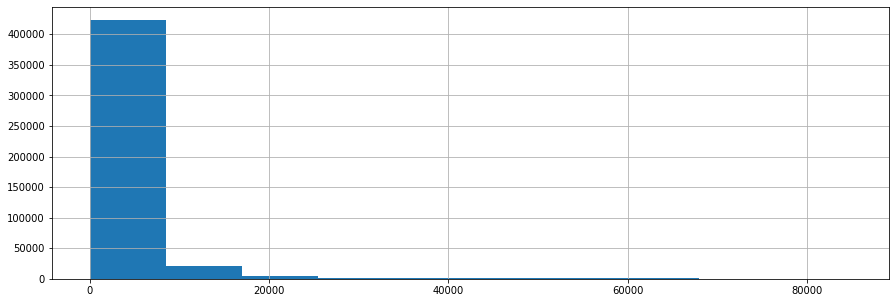

In [353]:
search_p2["second_diff"].hist(bins=10,figsize=(15,5))

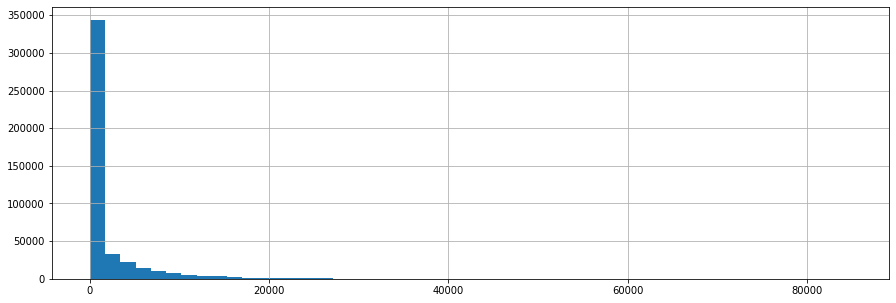

In [356]:
search_p2["second_diff"].hist(bins=50,figsize=(15,5))

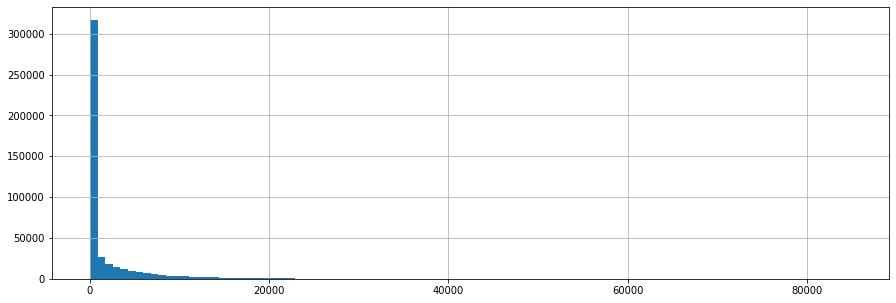

In [357]:
search_p2["second_diff"].hist(bins=100,figsize=(15,5))

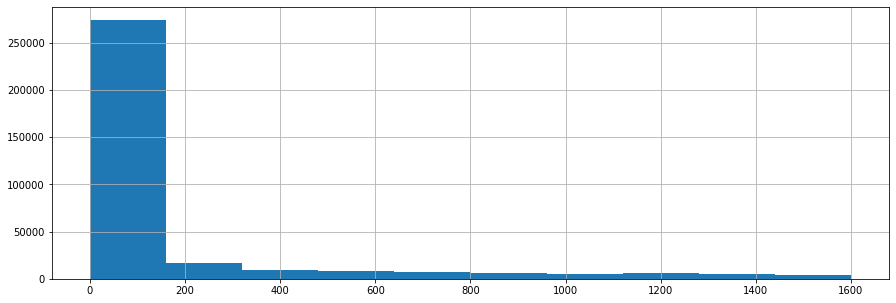

In [358]:
search_p2[search_p2["second_diff"]<=1600].second_diff.hist(bins=10,figsize=(15,5))

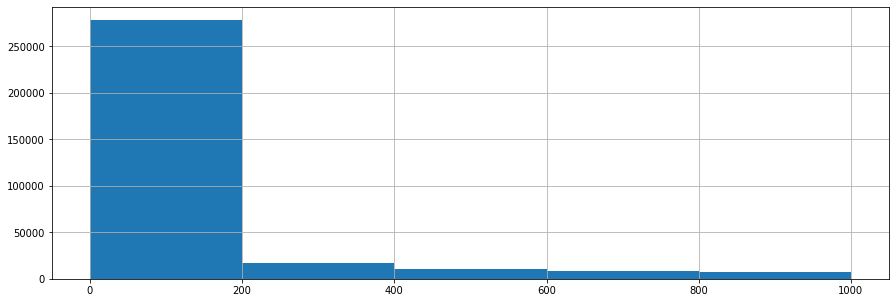

In [359]:
search_p2[search_p2["second_diff"]<=1000].second_diff.hist(bins=5,figsize=(15,5))

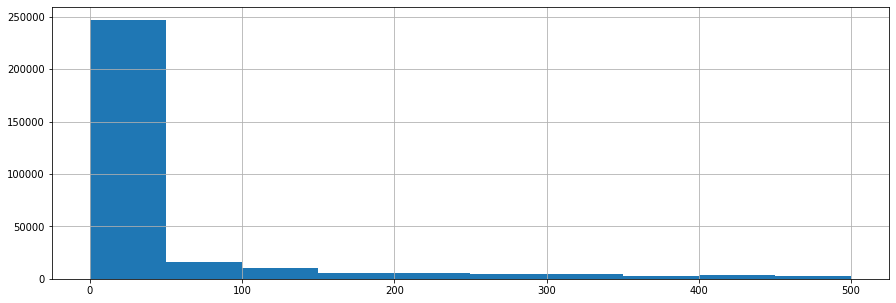

In [360]:
search_p2[search_p2["second_diff"]<=500].second_diff.hist(bins=10,figsize=(15,5))

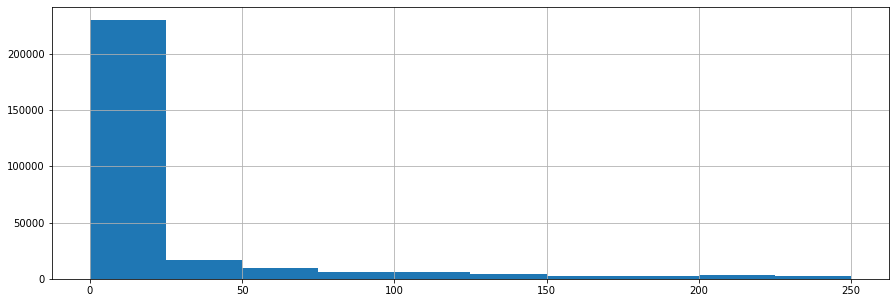

In [361]:
search_p2[search_p2["second_diff"]<=250].second_diff.hist(bins=10,figsize=(15,5))

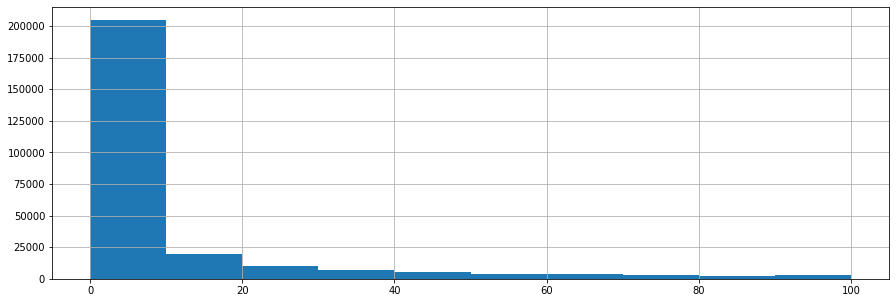

In [362]:
search_p2[search_p2["second_diff"]<=100].second_diff.hist(bins=10,figsize=(15,5))

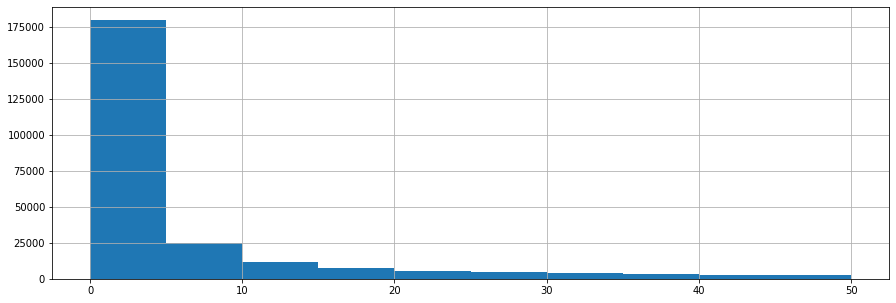

In [363]:
search_p2[search_p2["second_diff"]<=50].second_diff.hist(bins=10,figsize=(15,5))